# Download Dataset

In [ ]:
# menyambungkan GDrive
from google.colab import drive
drive.mount('/content/gdrive')

# mengonfigurasikan posisi file kaggle.json
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# mengubah lokasi saat ini ke lokasi konfigurasi
%cd /content/gdrive/My Drive/Kaggle

Mounted at /content/gdrive


In [ ]:
# download dataset pada kaggle
!kaggle datasets download -d mirichoi0218/insurance

# mengekstrak file zip dan menghapus file zip tersebut
!unzip \*.zip  && rm *.zip

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 2.15MB/s]


# Data Understanding
Dataset yang digunakan pada proyek ini dapat di-download melalui [Kaggle](https://archive.ics.uci.edu/ml/datasets/Restaurant+%26+consumer+data). Dataset berisikan 7 kolom yang memiliki 1338 sampel data. Detail dari masing-masing kolom dapat diuraikan sebagai berikut:

Atribut  | Keterangan
------------- | -------------
age | usia dari individu.
sex | jenis kelamin dari individu.
bmi | body mass index, memberikan pemahaman mengenai tubuh, apakah berat badan dari individu relatif tinggi atau rendah relatif terhadap tinggi badan.
children | jumlah anak yang ditanggung.
smoker | apakah individu merokok atau tidak.
region | daerah perumahan dari individu.
charges | biaya asuransi kesehatan.

## Data Loading

In [ ]:
# import library wajib proyek ML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# load dataset
insurance = pd.read_csv('insurance.csv')

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


>**Pembahasan:**<br>
Pada output di atas dapat diketahui bahwa tipe data kolom sudah sesuai dan tidak ada nilai kosong pada dataset.

In [ ]:
# list berisi kolom numerikal
num_col = insurance._get_numeric_data().columns.to_list()

# list berisi kolom kategorikal
cat_col = [col for col in insurance.columns if col not in num_col]

## Handler Duplicate Data

In [ ]:
# mengecek data yang kembar
insurance.duplicated().value_counts()

False    1337
True        1
dtype: int64

In [ ]:
# lihat data kembarnya
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# hapus data kembarnya
insurance = insurance.drop_duplicates()

insurance.duplicated().value_counts()

False    1337
dtype: int64

## Handler Outlier

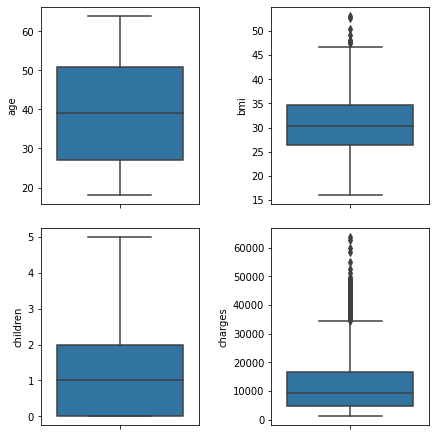

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(6,6))
index = 0
ax = ax.flatten()

for col in num_col:
    sns.boxplot(y=col, data=insurance, ax=ax[index])
    index = index + 1
plt.tight_layout(pad=0.5, w_pad=2, h_pad=2)

>**Pembahasan:**<br>
Pada visualisasi di atas dapat diketahui bahwa terdapat outlier yang perlu ditangani, dalam proyek ini digunakan IQR Method.

In [ ]:
Q1 = insurance.quantile(0.25)
Q3 = insurance.quantile(0.75)
IQR=Q3-Q1
insurance=insurance[~((insurance<(Q1-1.5*IQR))|(insurance>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
insurance.shape

(1192, 7)

>**Pembahasan:**<br>
Setelah penanganan outlier dengan IQR Method, jumlah sampel data yang sebelumnya 1337 data berubah menjadi 1192 data.

## Univariate Analysis

### Categorical Features

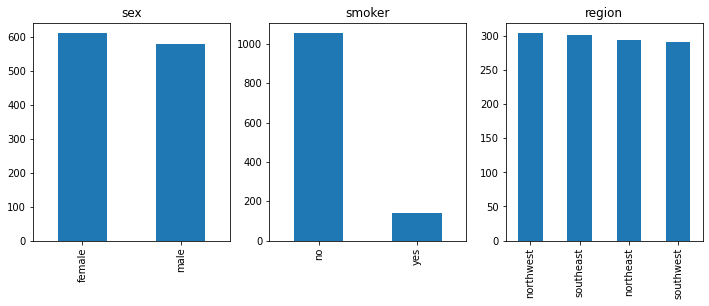

In [ ]:
fig = plt.figure(figsize=(12,4))

for i in range(len(cat_col)):
  feature = cat_col[i]
  count = insurance[feature].value_counts()
  percent = 100*insurance[feature].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  plt.subplot(131+i)
  count.plot(kind='bar', title=feature);

>**Pembahasan:**<br>
Pada visualisasi di atas dapat diketahui bahwa:
- Jumlah yang berjenis kelamin pria dan wanita hampir sama.
- Jumlah individu yang merokok sangat sedikit dibandingkan yang tidak merokok.
- Jumlah individu yang tinggal pada 4 (empat) perumahan berbeda hampir merata.

### Numerical Features

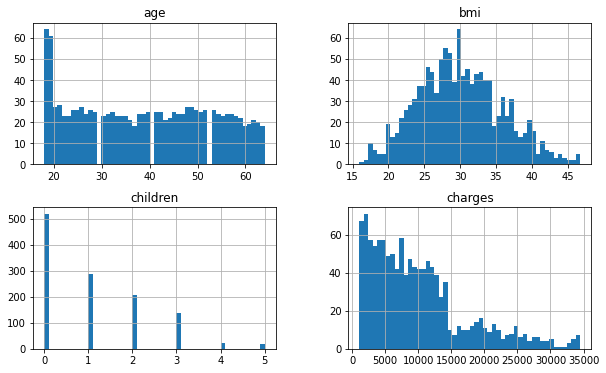

In [ ]:
insurance.hist(bins=50, figsize=(10,6))
plt.show()

>**Pembahasan:**<br>
Pada visualisasi di atas dapat diketahui bahwa:
- Distribusi biaya asuransi miring ke kanan (right-skewed).
- Distribusi bmi terlihat normal.
- Semakin naik jumlah anak, sampel data semakin menurun.

## Multivariate Analysis

### Categorical Features

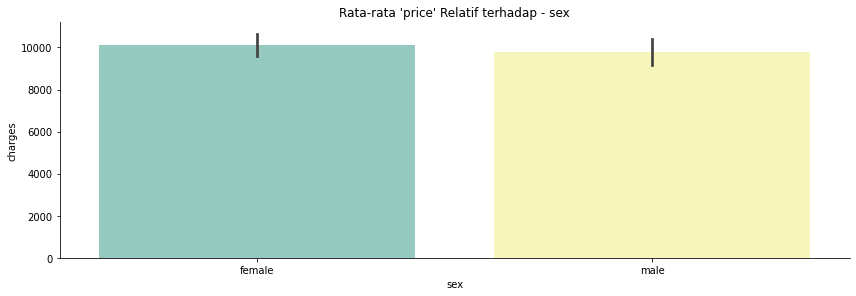

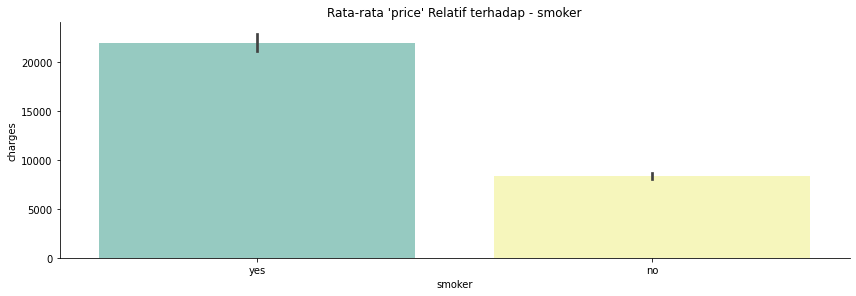

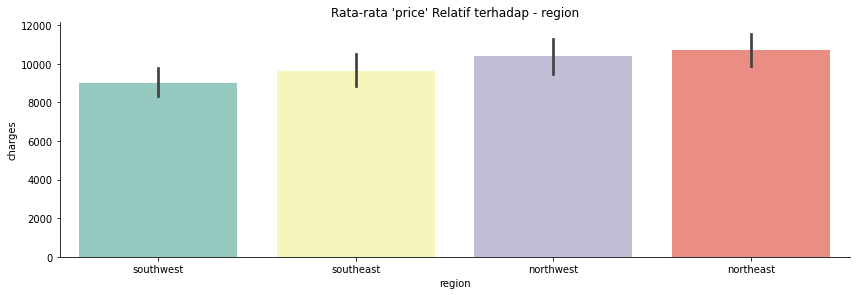

In [ ]:
for col in cat_col:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3,  data=insurance, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

>**Pembahasan:**<br>
Pada visualisasi di atas dapat diketahui bahwa:
- Rata-rata biaya asuransi kesehatan wanita sedikit lebih besar dibanding pria.
- Biaya asuransi kesehatan perokok lebih besar dibainding yang tidak merokok.

### Numerical Features

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

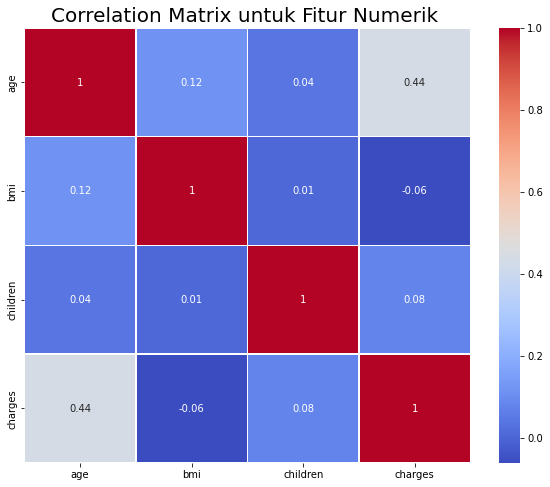

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = insurance.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

>**Pembahasan:**<br>
Pada visualisasi di atas dapat diketahui bahwa variabel `age` memiliki korelasi tertinggi terhadap variabel dependen.

# Data Preparation

## Encoding Categorical Features

In [ ]:
insurance.sex = insurance.sex.map({'female': 0, 'male': 1}).astype('int')
insurance.smoker = insurance.smoker.map({'yes': 1, 'no': 0}).astype('int')
insurance = pd.get_dummies(data=insurance, columns=['region'])

insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1192 non-null   int64  
 1   sex               1192 non-null   int64  
 2   bmi               1192 non-null   float64
 3   children          1192 non-null   int64  
 4   smoker            1192 non-null   int64  
 5   charges           1192 non-null   float64
 6   region_northeast  1192 non-null   uint8  
 7   region_northwest  1192 non-null   uint8  
 8   region_southeast  1192 non-null   uint8  
 9   region_southwest  1192 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 109.8 KB


>**Pembahasan:**<br>
Dilakukan transformasi terhadap kolom kategorikal (biasa disebut **encoding**) menggunakan Ordinal Encoder pada kolom `sex` dan `smoker` karena kedua kolom tersebut hanya memiliki 2 (dua) kemungkinan nilai, serta One Hot Encoding pada kolom `region` yang memiliki 4 (empat) kemungkinan nilai.

### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
 
X = insurance.drop(["charges"],axis =1) # variabel independen
y = insurance["charges"] #variabel dependen

# data latih 90%, data uji 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
# lihat total dan pembagian data
print(f'Total Dataset: {len(X)}')
print(f'Total Data Training: {len(X_train)}')
print(f'Total Data Testing: {len(X_test)}')

Total Dataset: 1192
Total Data Training: 1072
Total Data Testing: 120


### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

num_col = [col for col in num_col if col != 'charges']
scaler = StandardScaler()
scaler.fit(X_train[num_col])
X_train[num_col] = scaler.transform(X_train.loc[:, num_col])
X_train[num_col].head()

,age,bmi,children
688,0.570363,-0.995384,-0.078375
514,0.003503,-0.284467,-0.078375
101,-0.634214,-0.765182,-0.894085
56,1.349796,0.312197,0.737335
1149,0.216076,0.697277,-0.894085


>**Pembahasan:**<br>
Dilakukan transformasi terhadap kolom numerikal dengan proses standardisasi untuk menyamakan skala data sehingga algoritma Machine Learning dapat memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan.

In [ ]:
# standardisasi terhadap data uji
X_test.loc[:, num_col] = scaler.transform(X_test[num_col])

# Modeling + Evaluation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

best_knn = None
best_low_error = 100000

for i in range(1, 51):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  error = mean_squared_error(y_true=y_test, y_pred=knn.predict(X_test))/1e3
  if error < best_low_error:
    best_low_error = error
    best_knn = knn

best_low_error

24072.539668355967

>**Pembahasan:**<br>
Dilakukan pengujian model KNN dengan hyperparameter tuning `n_neighbors` dalam rentang 1-50 untuk mendapatkan model dengan error terkecil.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

best_rf = None
best_low_error = 100000

for i in range(1, 21):
  rf = RandomForestRegressor(n_estimators=50, max_depth=i, random_state=55, n_jobs=-1)
  rf.fit(X_train, y_train)
  error = mean_squared_error(y_true=y_test, y_pred=rf.predict(X_test))/1e3
  if error < best_low_error:
    best_low_error = error
    best_rf = rf

best_low_error

18929.895787557856

>**Pembahasan:**<br>
Dilakukan pengujian model RF dengan hyperparameter tuning `max_depth` dalam rentang 1-20 untuk mendapatkan model dengan error terkecil.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
error = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test))/1e3

error

21658.093371912462

>**Pembahasan:**<br>
Dilakukan pengujian model LR dengan hyperparameter tuning secara default.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
 
# membangun model dengan parameter C, gamma, dan kernel
svr = SVR()
svr_params = {
    'kernel': ['rbf'],
    'C':     [100, 1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
grid_search = GridSearchCV(svr, svr_params)
 
# melatih model dengan fungsi fit
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [100, 1000, 10000, 100000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [ ]:
svr  = SVR(**grid_search.best_params_)
svr.fit(X_train, y_train)
error = mean_squared_error(y_true=y_test, y_pred=svr.predict(X_test))/1e3

error

22540.78374229788

>**Pembahasan:**<br>
Dilakukan pengujian model SVM dengan hyperparameter tuning `C` dan `gamma` menggunakan teknik GridSearch.

In [ ]:
# membandingkan hasil evaluasi metrik ke-4 model dengan tabel
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','LR', 'SVR'])
model_dict = {'KNN': best_knn, 'RF': best_rf, 'LR': lr, 'SVR': svr}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,18916.6,24072.5
RF,7984.98,18929.9
LR,20725.8,21658.1
SVR,21340.1,22540.8


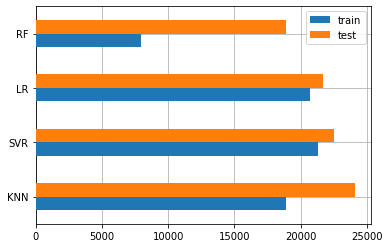

In [ ]:
# membandingkan hasil evaluasi metrik ke-4 model dengan visualisasi
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

>**Pembahasan:**<br>
Dapat terlihat pada gambar di atas bahwa jumlah error dari keempat model hampir terlihat sama tetapi algoritma RF yang memiliki nilai error terkecil. Sehingga model RF dapat digunakan sebagai pertimbangan untuk memprediksi biaya asuransi kesehatan.

In [ ]:
# mengecek hasil prediksi pada salah satu data
prediksi = X_test.iloc[5:6].copy()
pred_dict = {'y_true':y_test[5:6]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_LR,prediksi_SVR
768,14319.031,11972.5,13896.2,14023.1,14307.9
